# MARKING A MINERAL ON CORE SAMPLE USING COLOR SPACES + CONTOURS IN PYTHON

WRITTEN BY MOCHAMAD RISYAD RIZKYAFDHAL

MIT LICENSE

In [73]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

In [74]:
img = cv2.imread('Yoru Core Image Location')

In [75]:
grid_RGB = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)

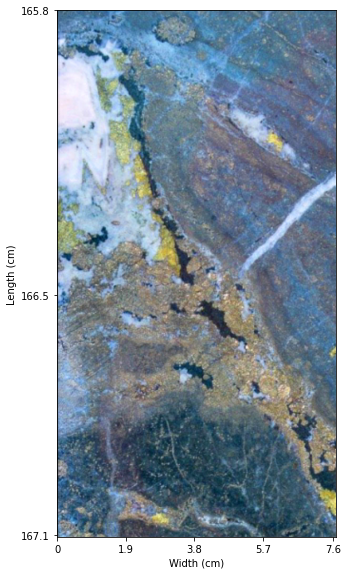

In [76]:
#Vertical Use plt.figure(figsize=(8,40))
#Horizontal Use plt.figure(figsize=(40,8))

plt.figure(figsize=(5,10))
plt.xticks([0, 200, 400, 600, 805], [0, 1.9, 3.8, 5.7, 7.6])
plt.yticks([0, 830, 1530], [165.8, 166.5, 167.1])
plt.xlabel('Width (cm)')
plt.ylabel('Length (cm)')
plt.imshow(grid_RGB)

In [77]:
grid_HSV = cv2.cvtColor (grid_RGB, cv2.COLOR_RGB2HSV)

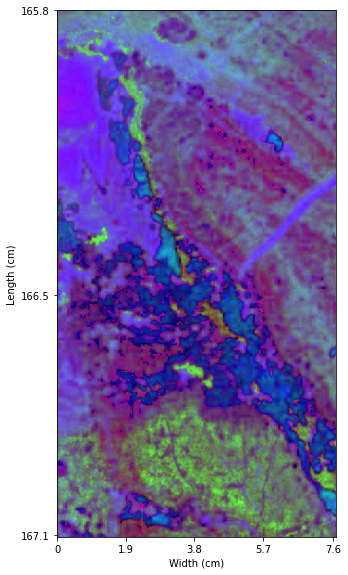

In [78]:
plt.figure(figsize=(5,10))
plt.xticks([0, 200, 400, 600, 805], [0, 1.9, 3.8, 5.7, 7.6])
plt.yticks([0, 830, 1530], [165.8, 166.5, 167.1])
plt.xlabel('Width (cm)')
plt.ylabel('Length (cm)')
plt.imshow(grid_HSV)

In [79]:
#([Hue,Saturation,Value])
#Hue (e.g Yellow, Dark Blue, Pink, etc.)
#Lower merupakan warna apa yang kita mau.
#Upper merupakan warna yang ingin kita diprediksi.

## Ore (Au-Cpy) Use:
#lower = np.array([20,80,180])
#upper = np.array([55,255,255])

## Ore (Au) Use:
#lower = np.array([20,70,150])
#upper = np.array([55,255,255])

## Quartz Use:
#lower = np.array([20,0,180)
#upper = np.array([240,100,255])

## Sodalite Use:
#lower = np.array([20,50,0])
#upper = np.array([55,255,255])


lower = np.array([20,70,150])
upper = np.array([55,255,255])
mask = cv2.inRange(grid_HSV, lower, upper)

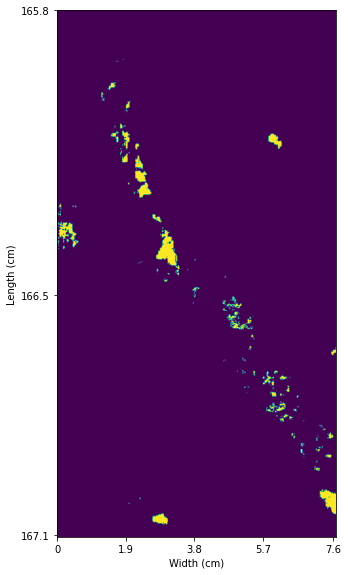

In [80]:
plt.figure(figsize=(5,10))
plt.xticks([0, 200, 400, 600, 805], [0, 1.9, 3.8, 5.7, 7.6])
plt.yticks([0, 830, 1530], [165.8, 166.5, 167.1])
plt.xlabel('Width (cm)')
plt.ylabel('Length (cm)')
plt.imshow(mask)

In [81]:
res = cv2.bitwise_and(grid_RGB, grid_RGB, mask=mask)

In [82]:
## If you want to threshold
#imgray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
#ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [83]:
VirtualMarker = cv2.drawContours(grid_RGB, contours, -1, (255,0,0), 2)

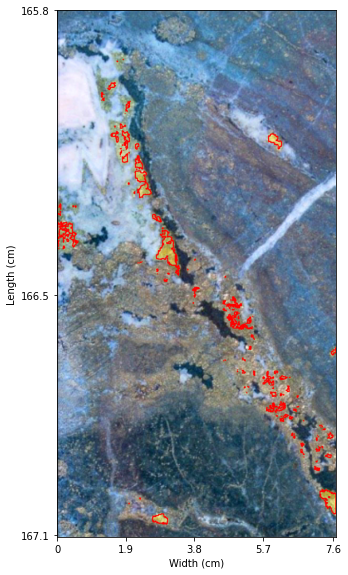

In [84]:
#plt.xticks([0, 200, 400, 600, 805], [0, 1.9, 3.8, 5.7, 7.6])
#plt.yticks([0, 830, 1530], [165.8, 166.5, 167.1])

#plt.xticks([0, 500, 1000, 1500, 1999], [0, 0.25, 0.5, 0.75, 1])
#plt.yticks([1, 550, 1200, 1850, 2500], [1.25, 1, 0.75, 0.5, 0.25])

plt.figure(figsize=(5,10))
plt.xticks([0, 200, 400, 600, 805], [0, 1.9, 3.8, 5.7, 7.6])
plt.yticks([0, 830, 1530], [165.8, 166.5, 167.1])
plt.xlabel('Width (cm)')
plt.ylabel('Length (cm)')
plt.imshow(VirtualMarker)